In [1]:
from inference import get_model
import supervision as sv
from inference.core.utils.image_utils import load_image_bgr

[03/15/25 08:09:36] WARNING  Your inference package version 0.40.0 is out of date! Please upgrade to ]8;id=384912;file:///home/masha/code/Diploma/.venv/lib/python3.12/site-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=806439;file:///home/masha/code/Diploma/.venv/lib/python3.12/site-packages/inference/core/__init__.py#41\41]8;;\
                             version 0.41.0 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

ModelDependencyMissing: Your `inference` configuration does not support PaliGemma model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support Florence2 model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to install missing requirements.
ModelDependencyMissing: Your `inference` configuration does

In [2]:
from PIL import Image
import numpy as np
import os

def load_images_from_folder_pillow(folder):
    images = []
    for filename in os.listdir(folder):
        try:
            img = Image.open(os.path.join(folder, filename)).convert('RGB') # Explicitly convert to RGB
            img_array = np.array(img)
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
            continue  # Skip to the next image

    return np.array(images)

# Example usage:
folder_path = "./new_extracted_frames" # Replace with the actual path
image_arrays = load_images_from_folder_pillow(folder_path)

In [3]:
image = image_arrays[8]

# Yolov5

In [4]:
import torch

model = torch.hub.load("ultralytics/yolov5", 'custom', path='yolov5s.pt')
model.classes = [0]  # Only person
model.conf = 0.5

Using cache found in /home/masha/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-11 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


image 1/1: 360x640 2 persons
Speed: 3.3ms pre-process, 33.4ms inference, 244.1ms NMS per image at shape (1, 3, 384, 640)


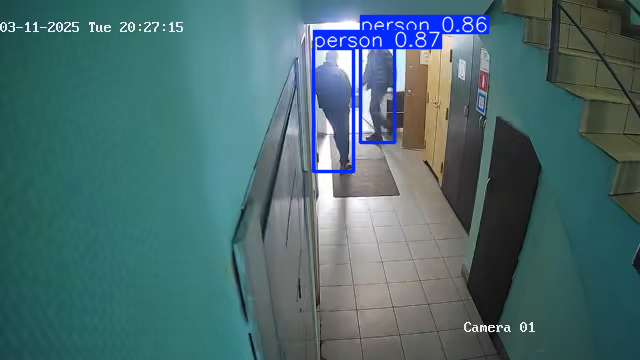

In [5]:
results = model(image)

# Results
results.print()
results.show()

# Yolov8

In [6]:
model = get_model(model_id="yolov8n-640")
results = model.infer(image)[0]
results = sv.Detections.from_inference(results)
annotator = sv.BoxAnnotator(thickness=4)
annotated_image = annotator.annotate(image, results)
annotator = sv.LabelAnnotator(text_scale=2, text_thickness=2)
annotated_image = annotator.annotate(annotated_image, results)
sv.plot_image(annotated_image)

# Yolov11

In [14]:
import torch

model = torch.load(f='yolo11n.pt', weights_only=False)
model

{'date': '2024-09-25T21:10:26.629566',
 'version': '8.2.100',
 'license': 'AGPL-3.0 License (https://ultralytics.com/license)',
 'docs': 'https://docs.ultralytics.com',
 'epoch': -1,
 'best_fitness': None,
 'model': DetectionModel(
   (model): Sequential(
     (0): Conv(
       (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (1): Conv(
       (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (2): C3k2(
       (cv1): Conv(
         (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
    

In [ ]:
results = model(image)

# Results
results.print()
results.show()

TypeError: 'dict' object is not callable

# Person-detection-yucm9/1

In [7]:
from inference_sdk import InferenceHTTPClient
import cv2

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="DEjLPJ8ox06Svxy1X1ig"
)

result = CLIENT.infer(image, model_id="person-detection-yucm9/1")
result

{'inference_id': 'a835d9ed-0ce2-4e8a-873c-ccf78f2ffd31',
 'time': 0.04663259699987066,
 'image': {'width': 640, 'height': 360},
 'predictions': [{'x': 334.5,
   'y': 108.0,
   'width': 43.0,
   'height': 126.0,
   'confidence': 0.6839543581008911,
   'class': 'face',
   'class_id': 0,
   'detection_id': '94b8c1c1-e469-4952-93ae-7b82f544b764'},
  {'x': 466.0,
   'y': 115.5,
   'width': 52.0,
   'height': 231.0,
   'confidence': 0.5372574329376221,
   'class': 'person',
   'class_id': 1,
   'detection_id': '117edf4c-9bda-4901-b1b7-1f7f283c65bf'},
  {'x': 377.5,
   'y': 93.0,
   'width': 33.0,
   'height': 102.0,
   'confidence': 0.4659578204154968,
   'class': 'face',
   'class_id': 0,
   'detection_id': 'f5ce795a-fa31-4f8d-b16a-7790959ff409'}]}

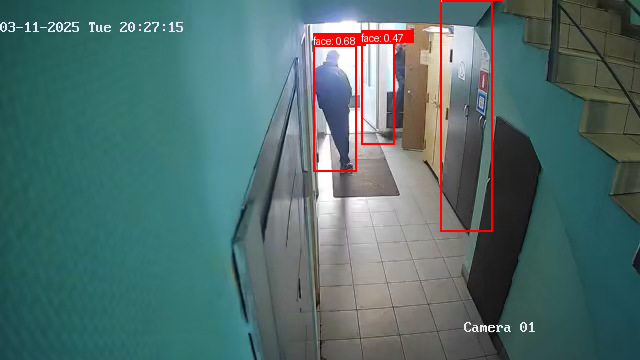

In [9]:
from PIL import Image, ImageDraw

img = Image.open('new_extracted_frames/opencv8.png')
draw = ImageDraw.Draw(img)

for prediction in result['predictions']:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    confidence = prediction['confidence']
    class_name = prediction['class']
    # Calculate the bounding box coordinates
    x1 = x - (width / 2)  # Top-left x coordinate
    y1 = y - (height / 2) # Top-left y coordinate
    x2 = x + (width / 2)  # Bottom-right x coordinate
    y2 = y + (height / 2) # Bottom-right y coordinate

    # Draw the bounding box
    draw.rectangle(((x1, y1), (x2, y2)), outline="red", width=2)  # Red box

    # Add label with class name and confidence
    label = f"{class_name}: {confidence:.2f}" # class name + confidence
    label_position = (x1, y1 - 10)  # Position label above box

    # Handle possible errors with text size calculations:
    try:
        text_width, text_height = draw.textsize(label)
    except AttributeError:
        text_width = len(label) * 5 # simple estimate of width of string
        text_height = 10

    # Draw the label background
    draw.rectangle((x1, y1 - text_height - 2, x1 + text_width + 2, y1), fill="red")

    # Draw the label text
    draw.text(label_position, label, fill="white")
img.show()  # Show the image (platform-dependent)
# save_path = "output.jpg"  # Specify a save path
# img.save(save_path)
# print(f"Image saved to {save_path}")